# Indice:


### **1. Análisis exploratório de los datos de Delitos_Chicago.csv**
     
     1.0 Nuestros datos
     1.1 Diccionario de datos
     1.2 Objetivo
     1.3 Importamos librerias y cargamos el dataframe.
     1.4 Entendiendo a los datos
     1.5 Reordenamiento las columnas
     1.6 Valores nulos
     1.7 Tipos de variables
     1.8 Columnas irrelevantes
     1.9 Outliers
     1.10 Transformación de variables
     1.11 Selección de variables
     1.12 Filas duplicadas

### **2. Modelo**



### **3. Anexo - Respuestas**
    
    Ejercicio 3  

# 1. Análisis exploratório de los datos

## 1.0 Nuestros datos

El Departamento de Policía de Chicago utiliza actualmente más de 400 códigos IUCR para clasificar los delitos penales, divididos en delitos "índice" y "no índice". Los delitos índice son los delitos recopilados en todo el país para documentar las tendencias delictivas a lo largo del tiempo (los datos se publican semestralmente) e incluyen asesinato, agresión sexual criminal, robo, agresión agravada y agresión, robo, hurto, robo de vehículos motorizados e incendio premeditado.Si tiene preguntas sobre este conjunto de datos, puede comunicarse con la División de Análisis y Cumplimiento de Datos del Departamento de Policía de Chicago en DFA@ChicagoPolice.org.

## 1.1 Diccionario de datos

Para comprender el conjunto de datos, se procede analizar cada variable.
Las variables disponibles en el dataset son las siguientes:

* **ID:** Identificador único para el registro.
* **Case Number:** El Número RD (Número de División de Registros) del Departamento de Policía de Chicago, que es único para el incidente.
* **Date:** Fecha en que ocurrió el incidente. esto es a veces una mejor estimación.
* **Block:** La dirección parcialmente redactada donde ocurrió el incidente, colocándola en el mismo bloque que la dirección real.
* **IUCR:** El código de Reporte de Delitos de Illinois Unifrom. Esto está directamente relacionado con el Primary Type y la Description.
* **Primary Type:** La descripción principal del código IUCR.
* **Description:** La descripción secundaria del código IUCR, una subcategoría de la descripción primaria.
* **Location Description:** Descripción del lugar donde ocurrió el incidente.
* **Arrest:** Indica si se realizó un arresto.
* **Domestic:** Indica si el incidente estuvo relacionado con el hogar según lo define la Ley de Violencia Doméstica de Illinois.
* **Beat:** Indica el barrio en la que se produjo el incidente. Una barrio es la zona geográfica más pequeña 
de la policía: cada distrito tiene una patrulla de policía específica. De tres a cinco distritos forman un sector policial, 
y tres sectores forman un distrito policial. El Departamento de Policía de Chicago tiene 22 distritos policiales
* **District:** Indica el distrito policial donde ocurrió el incidente.
* **Ward:** El barrio (distrito del Ayuntamiento) donde ocurrió el incidente.
* **Community Area:** Indica el área de la comunidad donde ocurrió el incidente. Chicago tiene 77 áreas comunitarias. 
* **FBI Code:** Indica la clasificación del delito como se describe en el Sistema Nacional de Informes Basados ​​en Incidentes (NIBRS) del FBI.
* **X Coordinate:** La coordenada x de la ubicación donde ocurrió el incidente en la proyección State Plane Illinois East NAD 1983. 
Esta ubicación se desplaza de la ubicación real para la redacción parcial, pero cae en el mismo bloque.
* **Y Coordinate:** La coordenada y del lugar donde ocurrió el incidente en la proyección State Plane Illinois East NAD 1983. 
Esta ubicación se desplaza de la ubicación real para la redacción parcial, pero cae en el mismo bloque.
* **Year:** Año en que ocurrió el incidente.
* **Updated On:** Fecha y hora en que se actualizó el registro por última vez.
* **Latitude:** La latitud del lugar donde ocurrió el incidente. Esta ubicación se desplaza de la ubicación real para la redacción parcial, 
pero cae en el mismo bloque. 
* **Longitude:** La longitud del lugar donde ocurrió el incidente. Esta ubicación se desplaza de la ubicación real para la redacción parcial, pero cae en el mismo bloque.
* **Location:** La ubicación donde ocurrió el incidente en un formato que permite la creación de mapas y otras operaciones geográficas en este portal de datos. 
Esta ubicación se desplaza de la ubicación real para la redacción parcial, pero cae en el mismo bloque.  

## 1.2 Objetivo:
- Plantear un modelo predictivo que prediga si un delito es doméstico o no doméstico. Para ello, considerar la variable Domestic como variable objetivo

En este momento, empieza en la fase de exploración y limpieza de datos para analizar el objetivo específico, que es estudiar los delitos domésticos a través de la variable **"Domestic"**.

## 1.3 Importamos librerias y cargamos el dataframe.

Para organizar y manipular los datos de manera eficiente, se carga el archivo **"Delitos_Chicago.csv"** como un **DataFrame**.

In [1]:
# Configuracion
import warnings 
import pandas as pd

# Para que pandas muestre todas las columnas
pd.options.display.max_columns = None

# No muestre warnings
warnings.filterwarnings("ignore")

In [2]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

In [4]:
# Ruta del archivo csv
ruta2 = "Delitos_Chicago.csv"

# Lectura a los archivos csv
datos2 = pd.read_csv(ruta2, sep = ',')

# Creando el dataframe
delitos_df = pd.DataFrame(datos2)

### 1.4 Entendiendo a los datos

- Shape
- Columns
- Info
- Describe

- Con **delitos_df.shape** se puede observar la dimsensión de nuestro dataset.

In [5]:
#Dimensión de los datos
delitos_df.shape

(264758, 22)

El dataframe tiene una dimensión de 264758 filas y 22 columnas

- Con los métodos **head()** se puede observar las primeras 5 las filas respectivamente del conjunto de datos.

In [6]:
# Primeras 5 filas del dataframe
delitos_df.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,10224738,HY411648,09/05/2015 01:30:00 PM,043XX S WOOD ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,924,9,12.0,61,08B,1165074.0,1875917.0,2015,02/10/2018 03:50:01 PM,41.815117,-87.670000,"(41.815117282, -87.669999562)"
1,10224739,HY411615,09/04/2015 11:30:00 AM,008XX N CENTRAL AVE,0870,THEFT,POCKET-PICKING,CTA BUS,False,False,1511,15,29.0,25,06,1138875.0,1904869.0,2015,02/10/2018 03:50:01 PM,41.895080,-87.765400,"(41.895080471, -87.765400451)"
2,10224740,HY411595,09/05/2015 12:45:00 PM,035XX W BARRY AVE,2023,NARCOTICS,POSS: HEROIN(BRN/TAN),SIDEWALK,True,False,1412,14,35.0,21,18,1152037.0,1920384.0,2015,02/10/2018 03:50:01 PM,41.937406,-87.716650,"(41.937405765, -87.716649687)"
3,10224741,HY411610,09/05/2015 01:00:00 PM,0000X N LARAMIE AVE,0560,ASSAULT,SIMPLE,APARTMENT,False,True,1522,15,28.0,25,08A,1141706.0,1900086.0,2015,02/10/2018 03:50:01 PM,41.881903,-87.755121,"(41.881903443, -87.755121152)"
4,10224742,HY411435,09/05/2015 10:55:00 AM,082XX S LOOMIS BLVD,0610,BURGLARY,FORCIBLE ENTRY,RESIDENCE,False,False,614,6,21.0,71,05,1168430.0,1850165.0,2015,02/10/2018 03:50:01 PM,41.744379,-87.658431,"(41.744378879, -87.658430635)"


- Con el atributo **.columns** se puede conocer las variables (columnas) del DataFrame.

In [7]:
# Columnas del dataframe
delitos_df.columns

Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate',
       'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude',
       'Location'],
      dtype='object')

- Se hace uso del método **info()** para ver la cantidad de valores nulos y los tipos de datos en cada columna.

In [8]:
delitos_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264758 entries, 0 to 264757
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   ID                    264758 non-null  int64  
 1   Case Number           264758 non-null  object 
 2   Date                  264758 non-null  object 
 3   Block                 264758 non-null  object 
 4   IUCR                  264758 non-null  object 
 5   Primary Type          264758 non-null  object 
 6   Description           264758 non-null  object 
 7   Location Description  264169 non-null  object 
 8   Arrest                264758 non-null  bool   
 9   Domestic              264758 non-null  bool   
 10  Beat                  264758 non-null  int64  
 11  District              264758 non-null  int64  
 12  Ward                  264756 non-null  float64
 13  Community Area        264758 non-null  int64  
 14  FBI Code              264758 non-null  object 
 15  

El conjunto de datos tiene:**
>- 2 variables de tipo **bool.**
>- 5 variables de tipo **float64**.
>- 5 variables tipo **int64**.
>- 10 variables de tipo **object**.
>- **Valores nulos** en las columnas **"Location Description", "Ward", "X Coordinate","Y Coordinate", "Latitude", "Longitude" y "Location".**

- Con el método **describe(include='all').round(2)**, se puede obtener las principales estadísticas de todas las variables, tanto numéricas como categóricas, redondeadas a 2 decimales.

In [9]:
delitos_df.describe(include = 'all').round(2)

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
count,264758.00,264758,264758,264758,264758,264758,264758,264169,264758,264758,264758.00,264758.00,264756.00,264758.00,264758,257931.00,257931.00,264758.0,264758,257931.00,257931.00,257931
unique,NaN,264731,112346,27519,331,33,339,136,2,2,NaN,NaN,NaN,NaN,26,NaN,NaN,NaN,2074,NaN,NaN,131466
top,NaN,HY346207,01/01/2015 12:01:00 AM,001XX N STATE ST,0820,THEFT,SIMPLE,STREET,False,False,NaN,NaN,NaN,NaN,06,NaN,NaN,NaN,02/10/2018 03:50:01 PM,NaN,NaN,"(41.883500187, -87.627876698)"
freq,NaN,4,197,768,24676,57350,27415,60755,194723,222776,NaN,NaN,NaN,NaN,57350,NaN,NaN,NaN,242053,NaN,NaN,490
mean,10138271.17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1144.02,11.21,22.81,37.58,NaN,1164455.94,1885560.18,2015.0,NaN,41.84,-87.67,NaN
std,474620.54,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,690.78,6.90,13.78,21.42,NaN,16468.55,31209.00,0.0,NaN,0.09,0.06,NaN
min,21714.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,111.00,1.00,1.00,1.00,NaN,1094231.00,1813897.00,2015.0,NaN,41.64,-87.93,NaN
25%,10033800.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,612.00,6.00,10.00,23.00,NaN,1152408.00,1858596.00,2015.0,NaN,41.77,-87.72,NaN
50%,10148677.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1023.00,10.00,23.00,32.00,NaN,1166063.00,1891472.00,2015.0,NaN,41.86,-87.67,NaN
75%,10263099.75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1654.00,16.00,34.00,57.00,NaN,1176389.00,1908452.00,2015.0,NaN,41.90,-87.63,NaN


**Se obtiene la siguiente información:**

- **"Case Number":** Tiene 264,731 datos únicos, lo que sugiere que se debe analizar cuidadosamente los datos duplicados.
- **"IUCR":** Es el código de reporte y tiene 331 valores únicos.
- **"Location Description":** Es el lugar donde ocurrió el incidente y tiene 136 datos únicos.
- **"FBI Code":** Es la clasificación del delito y tiene 26 datos únicos.

**DISTRIBUCIÓN DE TODOS LOS DELITOS POR NÚMERO DE DISTRITO**

In [10]:
import plotly.express as px

# Filtrando los delitos con coordenadas no nulas
mapa_delitos = delitos_df.loc[delitos_df['Longitude'] != 0]

# Creando el mapa de dispersión
fig = px.scatter(mapa_delitos, x='Longitude', y='Latitude', 
                 color='District',
title='Distribución de todos los delitos por número de distrito', height=600)

# Mostrando el mapa de dispersión
#fig.show()


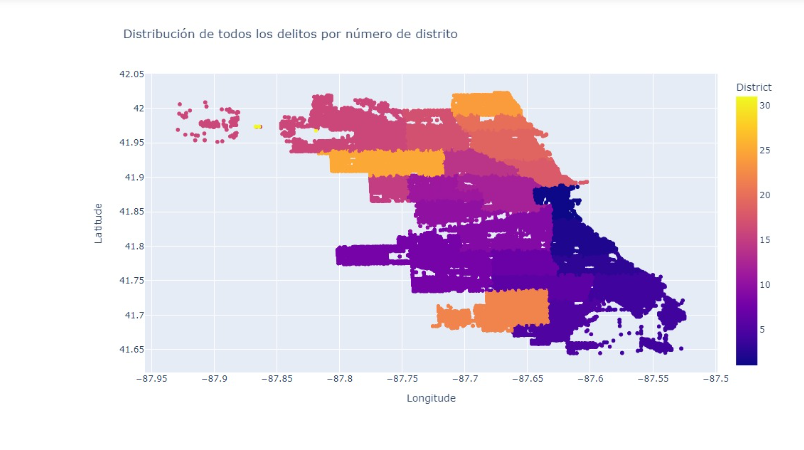

## 1.5 Reordenamiento de columnas

- Se reordena las columnas y se coloca el Target "Domesctic" al final del dataframe

In [11]:
delitos_df = delitos_df.reindex(columns=["ID",
            "Case Number","Date","Block","IUCR",
            "Primary Type","Description","Location Description",
            "Arrest","Beat","District","Ward","Community Area",
            "FBI Code","X Coordinate","Y Coordinate","Year",
            "Updated On","Latitude","Longitude","Location","Domestic"])

#columnas
delitos_df.head(2)

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,Domestic
0,10224738,HY411648,09/05/2015 01:30:00 PM,043XX S WOOD ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,924,9,12.0,61,08B,1165074.0,1875917.0,2015,02/10/2018 03:50:01 PM,41.815117,-87.6700,"(41.815117282, -87.669999562)",True
1,10224739,HY411615,09/04/2015 11:30:00 AM,008XX N CENTRAL AVE,0870,THEFT,POCKET-PICKING,CTA BUS,False,1511,15,29.0,25,06,1138875.0,1904869.0,2015,02/10/2018 03:50:01 PM,41.895080,-87.7654,"(41.895080471, -87.765400451)",False


## **1.6 Valores Nulos**

- Se observa la cantidad de valores nulos que hay por cada columna:

In [12]:
# Valores nulos por columna
delitos_df.isnull().sum()

ID                         0
Case Number                0
Date                       0
Block                      0
IUCR                       0
Primary Type               0
Description                0
Location Description     589
Arrest                     0
Beat                       0
District                   0
Ward                       2
Community Area             0
FBI Code                   0
X Coordinate            6827
Y Coordinate            6827
Year                       0
Updated On                 0
Latitude                6827
Longitude               6827
Location                6827
Domestic                   0
dtype: int64

Resultados:  
- 589 valores nulos en la columna **"Location Description"**
- 6827 valores nulos en la columna **"X Coordinate"**
- 6827 valores nulos en la columna **"Y Coordinate"**
- 6827 valores nulos en la columna **"Latitude"**
- 6827 valores nulos en la columna **"Longitude"**
- 6827 valores nulos en la columna **"Location"**
    - En el caso de la variable "Location Description", aunque tenga campos vacíos, podría convenirle conservarla, ya que si quiere determinar si el delito es doméstico o no, la descripción de la ubicación parece ser un factor importante a considerar al momento de decidir si es de índole doméstica o no.

## **1.7 Tipos de variables**

- Se cambia las columnas "Date" de tipo object a tipo datetime

In [13]:
from datetime import datetime
delitos_df["Date"] = delitos_df["Date"].astype('datetime64[ns]')

In [14]:
# Se rellena los valores nulos de "Num_Hospitals" con la media
delitos_df["Ward"] = delitos_df["Ward"].fillna(delitos_df["Ward"].mean())

In [15]:
# Se rellena los valores nulos de "Location Description" con la moda
delitos_df["Location Description"] = delitos_df["Location Description"].fillna(delitos_df["Location Description"].mode()[0])

-  Se verifica que los cambios se hayan realizado correctamente

In [16]:
delitos_df.isnull().sum()

ID                         0
Case Number                0
Date                       0
Block                      0
IUCR                       0
Primary Type               0
Description                0
Location Description       0
Arrest                     0
Beat                       0
District                   0
Ward                       0
Community Area             0
FBI Code                   0
X Coordinate            6827
Y Coordinate            6827
Year                       0
Updated On                 0
Latitude                6827
Longitude               6827
Location                6827
Domestic                   0
dtype: int64

Se puede observar que las columnas "Location Description" y  "Ward" no tiene valores nulos, sin embargo aún existen 5 columnas que tiene valores faltantes.

- Cambio de las columnas de tipo object a tipo int64:

In [17]:
#Se agrupa las varibale de tipo object
columns_object = delitos_df.loc[:, delitos_df.dtypes == object].columns
columns_object

Index(['Case Number', 'Block', 'IUCR', 'Primary Type', 'Description',
       'Location Description', 'FBI Code', 'Updated On', 'Location'],
      dtype='object')

In [18]:
#Aplicamos un LabelEncoder para convertir los datos en variables int64
from sklearn.preprocessing import LabelEncoder
delitos_df[columns_object] = delitos_df[columns_object].apply(LabelEncoder().fit_transform)

In [19]:
delitos_df["IUCR"] = delitos_df["IUCR"].astype("int16")
delitos_df["Community Area"] = delitos_df["Community Area"].astype("int8")
delitos_df["Beat"] = delitos_df["Beat"].astype("int16")
delitos_df["District"] = delitos_df["District"].astype("int32")

In [20]:
delitos_df['Arrest'].replace([False, True], [0, 1], inplace=True)

Se verifica los cambios realizados en los tipos de variables:

In [21]:
#Se comprueba el cambio:
delitos_df.dtypes

ID                               int64
Case Number                      int32
Date                    datetime64[ns]
Block                            int32
IUCR                             int16
Primary Type                     int32
Description                      int32
Location Description             int32
Arrest                           int64
Beat                             int16
District                         int32
Ward                           float64
Community Area                    int8
FBI Code                         int32
X Coordinate                   float64
Y Coordinate                   float64
Year                             int64
Updated On                       int32
Latitude                       float64
Longitude                      float64
Location                         int32
Domestic                          bool
dtype: object

## **1.8 Columnas irrelevantes**

- Se considera que las columnas **"ID", "Block", "Primary Type", "Description", "Year", "Updated On"** no aportaran información relevante para el análisis del modelo. 
- Por otro lado, las columnas **"X Coordinate", "Y Coordinate", "Latitude", "Longitude","Location"** se eliminarán por tener valores nulos.

In [22]:
#Se realiza una copia del dataframe 
df2 = delitos_df.copy()

- Se eliminan las columnas que se consideran irrelevantes

In [23]:
df2.drop(columns=["ID", "Block","Primary Type", 
                  "Description", "Year","Updated On",
                  "X Coordinate", "Y Coordinate", 
                  "Latitude", "Longitude","Location"], 
                   inplace=True, axis=1)

# DataFrame resultante
df2.head(2)

,Case Number,Date,IUCR,Location Description,Arrest,Beat,District,Ward,Community Area,FBI Code,Domestic
0,176117,2015-09-05 13:30:00,48,101,0,924,9,12.0,61,10,True
1,176108,2015-09-04 11:30:00,85,46,0,1511,15,29.0,25,7,False


In [24]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264758 entries, 0 to 264757
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   Case Number           264758 non-null  int32         
 1   Date                  264758 non-null  datetime64[ns]
 2   IUCR                  264758 non-null  int16         
 3   Location Description  264758 non-null  int32         
 4   Arrest                264758 non-null  int64         
 5   Beat                  264758 non-null  int16         
 6   District              264758 non-null  int32         
 7   Ward                  264758 non-null  float64       
 8   Community Area        264758 non-null  int8          
 9   FBI Code              264758 non-null  int32         
 10  Domestic              264758 non-null  bool          
dtypes: bool(1), datetime64[ns](1), float64(1), int16(2), int32(4), int64(1), int8(1)
memory usage: 11.6 MB


> Se decidió crear nuevos grupos basados en la fecha para obtener información adicional, como el día, tarde, noche y mes. Esto permitirá investigar si los delitos pueden tener una mayor propensión a ocurrir en el ámbito doméstico. Además se cree que la noche es un horario en el que estos delitos podrían ser más frecuentes, al igual que se cree que las condiciones climáticas durante los diferentes meses podrían aumentar el riesgo. Por ejemplo, no es lo mismo estar en casa todo el día durante el invierno, cuando se sale menos, que en otras estaciones.

In [25]:
from datetime import datetime

# Se define los rangos horarios
dia_inicio = datetime.strptime("06:00:00", "%H:%M:%S").time()
dia_fin = datetime.strptime("12:00:00", "%H:%M:%S").time()
tarde_inicio = datetime.strptime("12:01:00", "%H:%M:%S").time()
tarde_fin = datetime.strptime("18:00:00", "%H:%M:%S").time()
noche_inicio = datetime.strptime("18:01:00", "%H:%M:%S").time()
noche_fin = datetime.strptime("23:59:59", "%H:%M:%S").time()

# Función para agrupar las fechas en horarios
def grupo_horario(Date):
    hora = Date.time()
    if dia_inicio <= hora <= dia_fin:
        return "Mañana"
    elif tarde_inicio <= hora <= tarde_fin:
        return "Tarde"
    else:
        return "Noche"

# Se crea la columna con los horarios en el DataFrame
df2['Horario'] = df2['Date'].apply(grupo_horario)
# Creación de la columna con los meses en el DataFrame
df2['Mes'] = df2['Date'].dt.month

# DataFrame resultante
df2.head()

,Case Number,Date,IUCR,Location Description,Arrest,Beat,District,Ward,Community Area,FBI Code,Domestic,Horario,Mes
0,176117,2015-09-05 13:30:00,48,101,0,924,9,12.0,61,10,True,Tarde,9
1,176108,2015-09-04 11:30:00,85,46,0,1511,15,29.0,25,7,False,Mañana,9
2,176097,2015-09-05 12:45:00,231,118,1,1412,14,35.0,21,20,False,Tarde,9
3,176106,2015-09-05 13:00:00,70,17,0,1522,15,28.0,25,9,True,Tarde,9
4,176000,2015-09-05 10:55:00,76,101,0,614,6,21.0,71,6,False,Mañana,9


Se observa que el horario tiene 3 categorías y que los meses están definido por números

In [26]:
df2['Horario'].replace(["Mañana", "Tarde", "Noche"], [1, 2, 3], 
                       inplace=True)
# DataFrame resultante
df2.head()

,Case Number,Date,IUCR,Location Description,Arrest,Beat,District,Ward,Community Area,FBI Code,Domestic,Horario,Mes
0,176117,2015-09-05 13:30:00,48,101,0,924,9,12.0,61,10,True,2,9
1,176108,2015-09-04 11:30:00,85,46,0,1511,15,29.0,25,7,False,1,9
2,176097,2015-09-05 12:45:00,231,118,1,1412,14,35.0,21,20,False,2,9
3,176106,2015-09-05 13:00:00,70,17,0,1522,15,28.0,25,9,True,2,9
4,176000,2015-09-05 10:55:00,76,101,0,614,6,21.0,71,6,False,1,9


> Después de obtener información adicional a partir de la columna "Date", se llegó a la conclusión de que es el momento adecuado para eliminarla del conjunto de datos, ya que ya no le proporcionará otra información relevante.

- Se elimina la columna "Date"

In [27]:
#Eliminar la columna "Date"
df2 = df2.drop(columns = "Date")
df2

,Case Number,IUCR,Location Description,Arrest,Beat,District,Ward,Community Area,FBI Code,Domestic,Horario,Mes
0,176117,48,101,0,924,9,12.0,61,10,True,2,9
1,176108,85,46,0,1511,15,29.0,25,7,False,1,9
2,176097,231,118,1,1412,14,35.0,21,20,False,2,9
3,176106,70,17,0,1522,15,28.0,25,9,True,2,9
4,176000,76,101,0,614,6,21.0,71,6,False,1,9
...,...,...,...,...,...,...,...,...,...,...,...,...
264753,264682,114,89,0,832,8,17.0,66,13,False,3,2
264754,264678,203,101,0,1623,16,38.0,15,19,False,3,10
264755,255299,18,66,1,925,9,3.0,37,3,False,2,12
264756,264670,206,101,1,511,5,9.0,49,2,True,3,1


## 1.9 FILAS DUPLICADAS

Para evitar que se generen filas duplicadas conforme se transforman los datos, se decide realizar esta tarea justo antes de entrenar el modelo.

-Se utiliza la función .duplicated().sum() para obtener la cantidad de duplicados en el conjunto de datos. 

In [28]:
df2.duplicated().sum()

21

Se observa que el conjunto de datos tiene 21 registros duplicados.

- Se analiza los registros de las filas duplicadas

In [29]:
df2_dup = df2[df2.duplicated(keep=False)].groupby(list(df2.columns))
# Itera sobre cada grupo y muestra las filas juntas
for i, grupo in df2_dup:
    print(i)
    print(grupo)

(2876, 0, 122, 0, 414, 4, 7.0, 43, 0, False, 2, 1)
        Case Number  IUCR  Location Description  Arrest  Beat  District  Ward  \
246764         2876     0                   122       0   414         4   7.0   
247013         2876     0                   122       0   414         4   7.0   

        Community Area  FBI Code  Domestic  Horario  Mes  
246764              43         0     False        2    1  
247013              43         0     False        2    1  
(38735, 0, 21, 1, 1235, 12, 25.0, 31, 0, False, 3, 3)
        Case Number  IUCR  Location Description  Arrest  Beat  District  Ward  \
246719        38735     0                    21       1  1235        12  25.0   
246834        38735     0                    21       1  1235        12  25.0   

        Community Area  FBI Code  Domestic  Horario  Mes  
246719              31         0     False        3    3  
246834              31         0     False        3    3  
(39422, 0, 77, 0, 1124, 11, 28.0, 27, 0, False, 3, 3)

Se puede observar que los registros duplicados tienen los mismos valores en cada columna, por lo que es conveniente eliminarlos.

- Se procede a eliminar las filas duplicadas

In [30]:
df2 = df2.drop_duplicates()

- Se comprueba que no existan valores duplicados

In [31]:
df2.duplicated().sum()

0

In [32]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 264737 entries, 0 to 264757
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Case Number           264737 non-null  int32  
 1   IUCR                  264737 non-null  int16  
 2   Location Description  264737 non-null  int32  
 3   Arrest                264737 non-null  int64  
 4   Beat                  264737 non-null  int16  
 5   District              264737 non-null  int32  
 6   Ward                  264737 non-null  float64
 7   Community Area        264737 non-null  int8   
 8   FBI Code              264737 non-null  int32  
 9   Domestic              264737 non-null  bool   
 10  Horario               264737 non-null  int64  
 11  Mes                   264737 non-null  int64  
dtypes: bool(1), float64(1), int16(2), int32(4), int64(3), int8(1)
memory usage: 15.7 MB


Se puede observar que el dataframe actualizado está conformado por:
> - 12 columnas y 264737 filas.
> - 1 variable de tipo bool
> - 1 variable de tipo float64
> - 4 variables de tipo int32
> - 6 variables de tipo int64

- Se cambia los valores de la columna "Domestic" a valores 0 y 1

In [33]:
df2['Domestic'].replace([False, True], [0, 1], inplace=True)

- Se elimina la columna "Case Number"

In [34]:
df2.drop(columns=["Case Number"], inplace=True, axis=1)

- Se observa el número de ocurrencias únicas de cada valor de la columna "Location Description"

In [35]:
df2['Location Description'].value_counts()

122    61335
101    41844
17     35053
118    27879
88     10602
       ...  
73         1
49         1
121        1
56         1
68         1
Name: Location Description, Length: 136, dtype: int64

-Se cambia el tipo de variable "Domestic" a int8

In [36]:
df2['Domestic'] = df2['Domestic'].astype('int8')

**Gráfico de Pearson**
-El gráfico de Pearson nos proporciona una representación visual de la relación y la fuerza de la correlación entre dos variables cuantitativas, lo cual es útil para el análisis y la interpretación de datos.

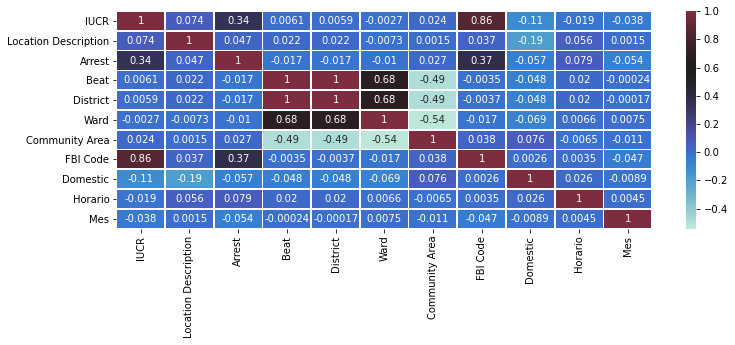

In [37]:
# Se crea la gráfica de mapa de calor mostrando la correlación de Pearson entre las variables cuantitativas
plt.figure(figsize = (12,4))
sns.heatmap(df2.corr(), annot = True, center = 0.6, 
            linewidths = 0.7, linecolor = "white")
plt.show()

- Dado que el dataset contiene variables cuantitativas, se decide cambiar el tipo de estas variables a categóricas para el modelo.

In [38]:
df2['IUCR'] = df2['IUCR'].astype('category')
df2['Location Description'] = df2['Location Description'].astype('category')
df2['Arrest'] = df2['Arrest'].astype('category')
df2['Beat'] = df2['Beat'].astype('category')
df2['District'] = df2['District'].astype('category')
df2['Ward'] = df2['Ward'].astype('category')
df2['Community Area'] = df2['Community Area'].astype('category')
df2['FBI Code'] = df2['FBI Code'].astype('category')
df2['Domestic'] = df2['Domestic'].astype('category')
df2['Horario'] = df2['Horario'].astype('category')
df2['Mes'] = df2['Mes'].astype('category')
df2['Community Area'] = df2['Community Area'].astype('category')

In [39]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 264737 entries, 0 to 264757
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype   
---  ------                --------------   -----   
 0   IUCR                  264737 non-null  category
 1   Location Description  264737 non-null  category
 2   Arrest                264737 non-null  category
 3   Beat                  264737 non-null  category
 4   District              264737 non-null  category
 5   Ward                  264737 non-null  category
 6   Community Area        264737 non-null  category
 7   FBI Code              264737 non-null  category
 8   Domestic              264737 non-null  category
 9   Horario               264737 non-null  category
 10  Mes                   264737 non-null  category
dtypes: category(11)
memory usage: 5.6 MB


## 2. Análisis del modelos

### Modelo de Regresión Logística

- La regresión logística es un modelo de clasificación que se utiliza para predecir una variable categórica binaria utilizando un conjunto de variables independientes

In [40]:
#Se importa las librerías necesarias
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

#Se carga los datos
X = df2.loc[:, ~df2.columns.isin(['Domestic'])]
y = df2.loc[:, 'Domestic']

#Se divide los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=42)

# Se define el modelo de regresión logística
clf = LogisticRegression(penalty='l2', max_iter=3000)

#Se entrena el modelo con el conjunto de entrenamiento
clf.fit(X_train, y_train)

#Se realiza las predicciones con el conjunto de prueba
y_pred = clf.predict(X_test)

#Puntuación del modelo
print("Puntuación train: {:.2f}%"
      .format(clf.score(X_train, y_train) * 100))

#Puntuación del modelo en los datos de prueba
print("Precisión test: {:.2f}%"
      .format(clf.score(X_test, y_test) * 100))

print("Error:", mean_squared_error(y_test, y_pred))

Puntuación train: 83.37%
Precisión test: 83.55%
Error: 0.1644632469592808


> Basándonos en los resultados obtenidos del modelo de regresión logística, se puede concluir que el modelo tiene una buena capacidad predictiva para predecir si un delito es doméstico o no doméstico, y que la precisión obtenida en los datos de entrenamiento y prueba es de aproximadamente el 83%. Esta precisión indica que el modelo es capaz de predecir correctamente en alrededor del 83% de los casos si un delito es doméstico o no.<br>
El error cuadrático medio obtenido en este modelo ha sido de aproximadamente 0.164, lo que sugiere que el modelo ha cometido un error relativamente bajo al realizar las predicciones en los datos de prueba. Sin embargo, es importante tener en cuenta que el valor del error cuadrático medio depende del rango de valores de la variable objetivo y que, de forma aislada, no es suficiente para evaluar la calidad del modelo.

### Modelo de Clasificación: Random Forest

- Random Forest es un algoritmo de aprendizaje supervisado que se basa en la construcción de un conjunto de árboles de decisión. Cada árbol se entrena con una muestra aleatoria de los datos de entrenamiento y sigue un camino único. Durante la construcción de cada árbol, las observaciones se asignan a diferentes nodos hasta llegar a un nodo final.
- El objetivo de cada árbol es maximizar la ganancia de información en cada nodo. Para obtener una predicción final, el algoritmo realiza una votación entre las respuestas de cada árbol y elige la clase más frecuente.

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets, metrics

X= df2.loc[:,~df2.columns.isin(['Domestic'])]
y = df2.loc[:,'Domestic']

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                        test_size=0.20, random_state=42)

model = RandomForestClassifier(max_depth = 10, random_state=0)
model.fit(X_train,y_train)

pred = model.predict(X_test)

print("Prediccion: ", pred)
print("real:", y_test.values)
print("Prediccion train: ", model.score(X_train, y_train))
print("Prediccion test: ",metrics.accuracy_score(y_test, pred))

for col,pred in zip(X_train.columns,model.feature_importances_):
    if 0.019 <pred:
        print(f"{col}: {pred}")

Prediccion:  [0 0 0 ... 0 0 1]
real: [0, 0, 0, 0, 0, ..., 0, 0, 0, 0, 1]
Length: 52948
Categories (2, int64): [0, 1]
Prediccion train:  0.9271869643843637
Prediccion test:  0.9250018886454635
IUCR: 0.6017316445007879
Location Description: 0.1344087826702362
FBI Code: 0.20939235156792188


>El uso del modelo Random Forest también parece ser efectivo para predecir si un delito es doméstico o no, obteniendo una precisión de aproximadamente el 93% en los datos de entrenamiento y del 92% en los datos de prueba. Esta precisión indica que el modelo es capaz de predecir correctamente en alrededor del 92% de los casos si un delito es doméstico o no.<br>
Asimismo, el análisis de la importancia de las características muestra que las variables más importantes para la clasificación son "IUCR" (con un 60% de predominio), "FBI Code" (con un 21% de predominio) y "Location Description" (con un 13% de predominio). Lo cual nos indica que estas variables tienen una fuerte influencia en la capacidad del modelo para realizar predicciones.

### Análisis de las Métricas

Las métricas son utilizadas principalmente para evaluar la calidad o eficacia de cualquier modelo.

In [42]:
from sklearn.model_selection import cross_validate
result = cross_validate(model, X, y, scoring=['accuracy', 
                                    'precision', 'recall'])
print(pd.DataFrame(result).T,end="\n\n")
print("Media: \n\n",pd.DataFrame(result).mean())

                        0          1          2          3          4
fit_time        14.942476  14.788616  14.686264  16.592016  15.067124
score_time       0.563992   0.575764   0.576844   0.592193   0.592247
test_accuracy    0.925644   0.923850   0.924358   0.924245   0.892628
test_precision   0.889860   0.874143   0.869924   0.867561   0.881509
test_recall      0.606169   0.607194   0.614936   0.616365   0.373035

Media: 

 fit_time          15.215299
score_time         0.580208
test_accuracy      0.918145
test_precision     0.876599
test_recall        0.563540
dtype: float64


Se evaluó también el desempeño en las métricas de precisión y recall. El valor promedio de precision fue de aproximadamente 87,5%, lo que sugiere que el modelo es capaz de predecir la variable "Domestic" correctamente en alrededor del 87,5% de los casos, y el valor promedio de recall fue de aproximadamente 56%, lo que significa que el modelo es capaz de identificar correctamente el 56% de los delitos domésticos que se presentan en el conjunto de datos.

## 3. Anexo - Respuestas

## Ejercicio 3

• **¿A qué tipo de modelo predictivo os enfrentáis?**

En este caso se está trabajando con un modelo de regresión logística, el cual es un modelo de clasificación que se utiliza para predecir una variable categórica binaria utilizando un conjunto de variables independientes como entrada. En este caso, la variable "Domestic" solo puede tomar dos valores: 0 y 1, lo cual es indicativo de que se trata de una variable categórica binaria."

• **¿Qué variables son útiles para conseguir este objetivo y cuáles no? Justificad vuestra respuesta**

En este caso, considerando el contexto del problema, se identifican varias variables que pueden ser útiles para predecir la variable "Domestic". Entre estas variables se encuentran: Location Description, Arrest, Beat, District, Ward, FBI Code, Mes y Horario.

La ubicación del delito (Location Description) puede ser relevante, ya que es posible que los delitos domésticos ocurran con mayor frecuencia en ciertos lugares específicos. La presencia de un arresto (Arrest) también puede ser importante, ya que puede indicar si el delito involucra a personas conocidas o relacionadas entre sí.

El distrito y el sector (District y Beat) pueden desempeñar un papel significativo, ya que ciertas áreas geográficas pueden estar más propensas a tener delitos domésticos. Además, el código de delitos (FBI Code) proporciona información sobre la naturaleza del delito y puede ser un indicador útil para determinar si es de índole doméstica.

Considerar el mes y la hora del delito (Mes y Horario) también puede ser relevante, ya que podrían existir patrones temporales en la ocurrencia de delitos domésticos. Por ejemplo, puede haber una mayor incidencia de delitos domésticos durante ciertas épocas del año o en determinados momentos del día, como durante la noche.

• **Evaluad el error cometido tras el desarrollo del modelo predictivo.**

En el caso de la regresión logística, se utilizó el error cuadrático medio (mean squared error) para evaluar el error en las predicciones. El error cuadrático medio obtenido fue de aproximadamente 0.164, lo que sugiere que el modelo ha cometido un error relativamente bajo al realizar predicciones en los datos de prueba.<br>
Para el caso del modelo de Random Forest, no se utilizó directamente el error cuadrático medio como medida de evaluación del error, sin embargo se evaluó la precisión, precisión (precision) y recall, lo que permite evaluar de forma indirecta el desempeño del modelo.<br>
En general, ambos modelos parecen haber cometido un error relativamente bajo en las predicciones realizadas. <br>